In [1]:
# importing necessary libraries and packages for image classification
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2022-11-05 09:46:05.570120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# creating classifier object from sequential class to initialise our neural network model as a sequential network.
classifier = Sequential()

# adding convolution layer by using Conv2D function and setting rectilinear function as the activation function.
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# now we need to perform pooling operation on resultant feature map and reduce the size of image as much as possible.
# for this we'll use MaxPool2D function.
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# We'll convert all the pooled images into a continuous vector through Flattening.
# What we are basically doing here is taking the 2-D array, i.e pooled image pixels 
# and converting them to a one dimensional single vector.
classifier.add(Flatten())

# Here we are going to add two fully connected layers.
# first layer has 128 units of neurons as relu as its activation function.
classifier.add(Dense(units = 128, activation = 'relu'))
# second layer has a single neuron in the layer and a sigmoid activation function.
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# After adding all the layers we'll compile the model and set its optimizer as adam 
# loss function as binary_crossentropy.
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2022-11-05 09:46:09.620830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Before training our model we preprocess our data using keras.preprocessing.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# we are creating synthetic data out of the same images by performing different type of 
# operations on these images like flipping, rotating, blurring, etc.
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# now we assign training dataset and test dataset repectively.
training_set = train_datagen.flow_from_directory('/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/train', 
                                                 target_size = (64, 64), batch_size = 32, 
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/test', 
                                            target_size = (64, 64), batch_size = 32, 
                                            class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 12499 images belonging to 2 classes.


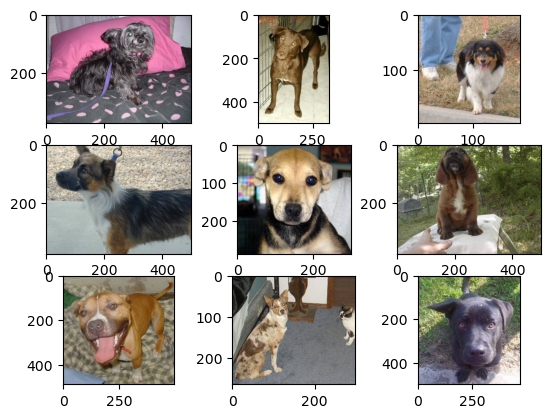

In [4]:
# Here we are going to plot first few images from dog dataset.
# for that we import following libraries.
from matplotlib import pyplot
from matplotlib.image import imread

# define location of dataset
folder = '/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/train/dogs/'

# plot first few images
for i in range(9):
	# define subplot
    pyplot.subplot(330 + 1 + i)
	# define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
    image = imread(filename)
	# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

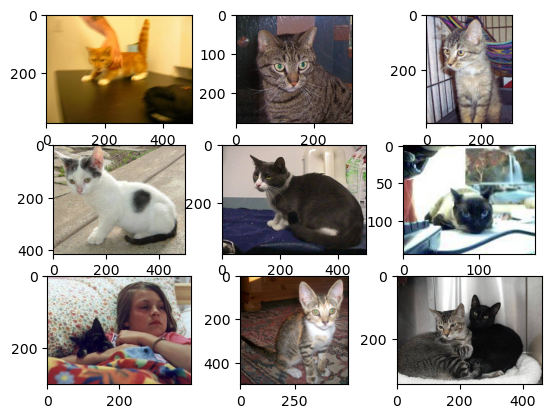

In [5]:
# Here we are going to plot first few images from dog dataset.
# for that we import following libraries.

from matplotlib import pyplot
from matplotlib.image import imread

# define location of dataset
folder = '/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/train/cats/'

# plot first few images
for i in range(9):
        # define subplot
    pyplot.subplot(330 + 1 + i)
        # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
        # load image pixels
    image = imread(filename)
        # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [6]:
# After preprocessing and assigning the data we finally train our model.
# we set the taining dataset, steps/epoch as 700 and total epochs as 10 for both
# training and cross validation dataset.

history = classifier.fit(training_set, steps_per_epoch = 700, epochs = 10, validation_data = test_set, 
                         validation_steps = 700)

Epoch 1/10
700/700 [==============================] - 94s 133ms/step - loss: 0.6070 - accuracy: 0.6693 - val_loss: 0.9262 - val_accuracy: 0.4977
Epoch 2/10
700/700 [==============================] - 70s 100ms/step - loss: 0.5462 - accuracy: 0.7215
Epoch 3/10
700/700 [==============================] - 70s 100ms/step - loss: 0.5107 - accuracy: 0.7467
Epoch 4/10
700/700 [==============================] - 70s 100ms/step - loss: 0.4895 - accuracy: 0.7608
Epoch 5/10
700/700 [==============================] - 70s 100ms/step - loss: 0.4810 - accuracy: 0.7676
Epoch 6/10
700/700 [==============================] - 70s 100ms/step - loss: 0.4639 - accuracy: 0.7779
Epoch 7/10
700/700 [==============================] - 70s 101ms/step - loss: 0.4536 - accuracy: 0.7836
Epoch 8/10
700/700 [==============================] - 70s 100ms/step - loss: 0.4385 - accuracy: 0.7933
Epoch 9/10
700/700 [==============================] - 70s 100ms/step - loss: 0.4315 - accuracy: 0.8000
Epoch 10/10
700/700 [==========

In [7]:
# Post training we print the summary of our CNN
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
______________________________________________

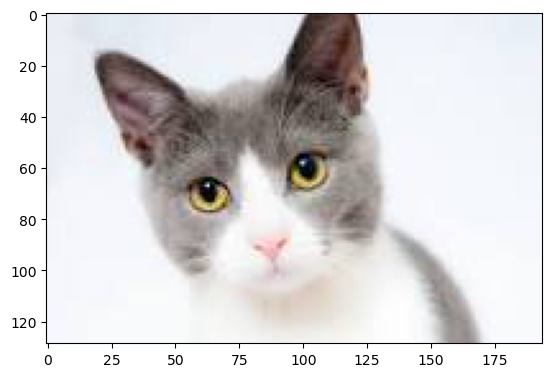

1/1 [==============================] - 0s 19ms/step
cat


In [15]:
# After finishing the training we'll test our model for new images of cats and dogs.
import numpy as np
from tensorflow.keras.preprocessing import image
# first we load the new image and then convert the image into necessary format i.e. array.
test_image = image.load_img('/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/cat_test_img10.jpeg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)

# Here we are plotting the image using imread function from matplotlib library
img = mpimg.imread('/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/cat_test_img10.jpeg')
imgplot = plt.imshow(img)
plt.show()

# Now we make prediction for our new data and print the prediction.
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

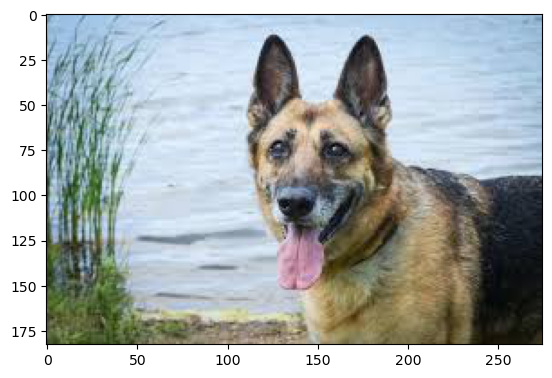

1/1 [==============================] - 0s 17ms/step
dog


In [9]:
# After finishing the training we'll test our model for new images of cats and dogs.
import numpy as np
from tensorflow.keras.preprocessing import image
# first we load the new image and then convert the image into necessary format i.e. array.
test_image = image.load_img('/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/dog_test_img6.jpeg', 
                            target_size = (64, 64))
test_image = image.img_to_array(test_image)

# Here we are plotting the image using imread function from matplotlib library
img = mpimg.imread('/Users/harshmaheshwari/Documents/AIML/Classification Dataset Sem-5/dog_test_img6.jpeg')
imgplot = plt.imshow(img)
plt.show()

# Now we make prediction for our new data and print the prediction.
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

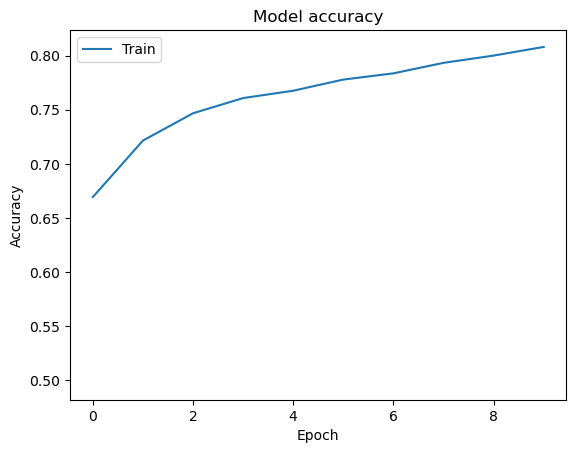

In [10]:
# Here is the plot for 'Accuracy vs Epoch' of the above model.
# This graph shows how the accuracy of the neural network on training dataset imporves after every epoch.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

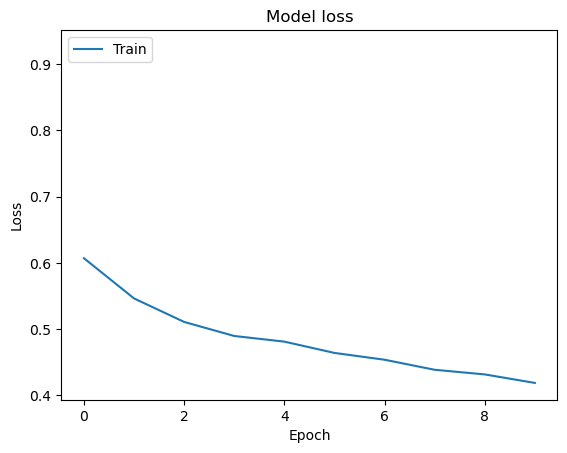

In [11]:
# Here is the plot for 'Loss vs Epoch' of the above model.
# This graph shows how the loss of the neural network decreases on training dataset after every epoch.
# We have used plot funtion from matplotlib to show the curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()